#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from scipy.spatial import distance  
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

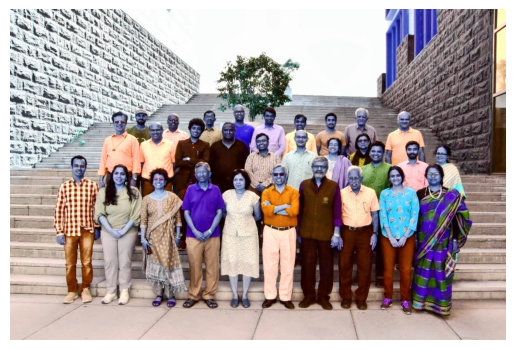

In [2]:
image = cv2.imread("Plaksha_Faculty.jpg")

plt.imshow(image)
plt.axis("off") 
plt.show()

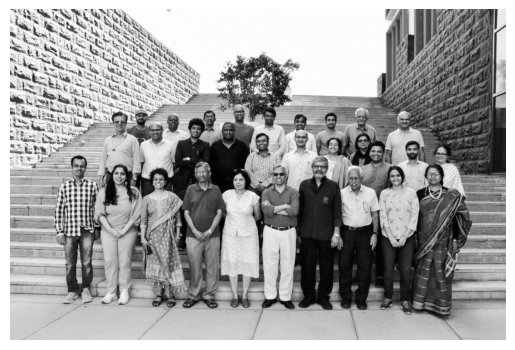

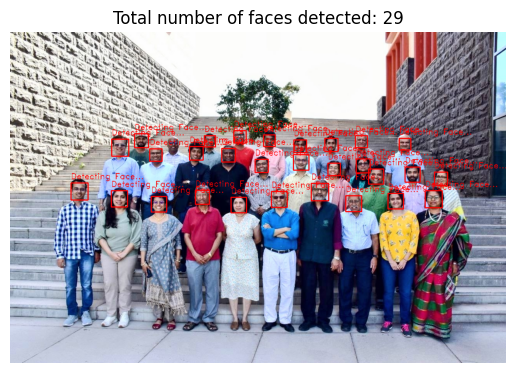

In [3]:
## Reading the image plaksha_Faculty.jpg
# Read  above

## Convert the image to grayscale

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.axis("off") 
plt.savefig("gray_scale_image.png", dpi=300, bbox_inches='tight')
plt.show()



# Loading the required haar-cascade xml classifier file

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  


# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.

faces_rect = face_cascade.detectMultiScale(gray_img, 1.112, 3, minSize=(20,20), maxSize=(50,50))
 


# Define the text and font parameters

text = "Detecting Face..." ## The text you want to write
font = cv2.FONT_HERSHEY_DUPLEX  ## Font type
font_scale = 0.7 ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text


  
# Iterating through rectangles of detected faces

for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(image, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    


## Display the image and window title should be "Total number of face detected are #" 
#  
# cv2.imshow(f"Total number of faces detected: {len(faces_rect)}", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.title(f"Total number of faces detected: {len(faces_rect)}") 
plt.axis("off")  
plt.savefig("face_detection_1.png", dpi=300, bbox_inches='tight')
plt.show()


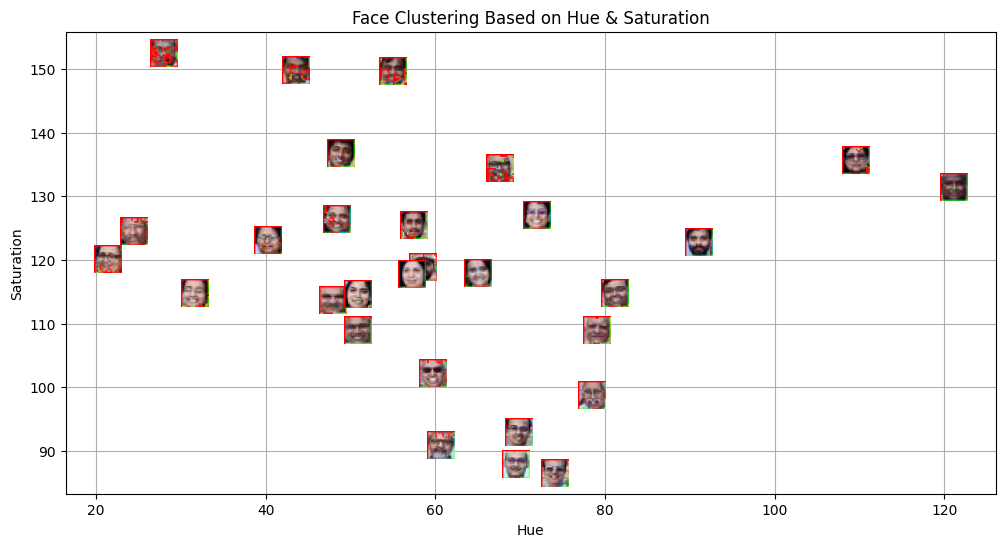

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)



## Perform k-Means clustering on hue_saturation and store in kmeans

kmeans = KMeans(n_clusters = 2, random_state = 42, n_init='auto')
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_



# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel("Hue")  
plt.ylabel("Saturation") 
plt.title("Face Clustering Based on Hue & Saturation")  
plt.grid(True)
plt.savefig("face_clustering_1.png", dpi=300, bbox_inches='tight')
plt.show() 

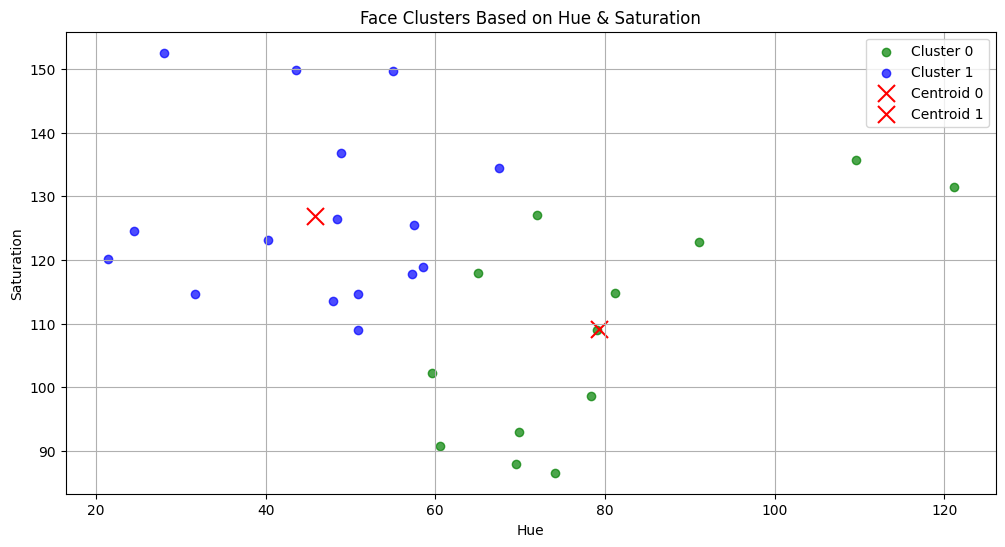

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", alpha=0.7)

cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", alpha=0.7)


# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]


# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=150, label="Centroid 0")

plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=150, label="Centroid 1")


plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clusters Based on Hue & Saturation")
plt.legend() 
plt.grid(True)  
plt.savefig("hue_and_saturation_clustering_1.png", dpi=300, bbox_inches='tight')
plt.show()  


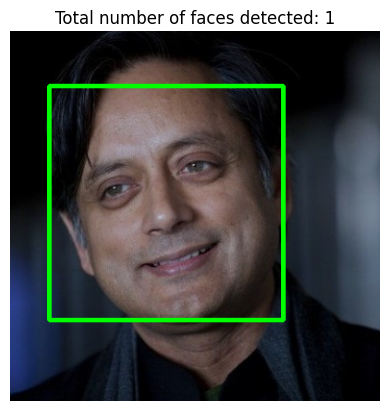

In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")


# Detect face  in the template image after converting it to gray and store it in template_faces
gray_i = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

template_faces = face_cascade.detectMultiScale(gray_i, 1.112, 3, minSize=(20,20), maxSize=(500,500))


# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
# cv2.imshow(_____________________________________________________)
# cv2.waitKey(0)
# cv2.destroyAllWindows()    
  
# I was facing some problem in cv2 with docker, so I used plt.imshow() instead.

plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)) 
plt.title(f"Total number of faces detected: {len(template_faces)}") 
plt.axis("off")  
plt.savefig("template_image.png", dpi=300, bbox_inches='tight')
plt.show()

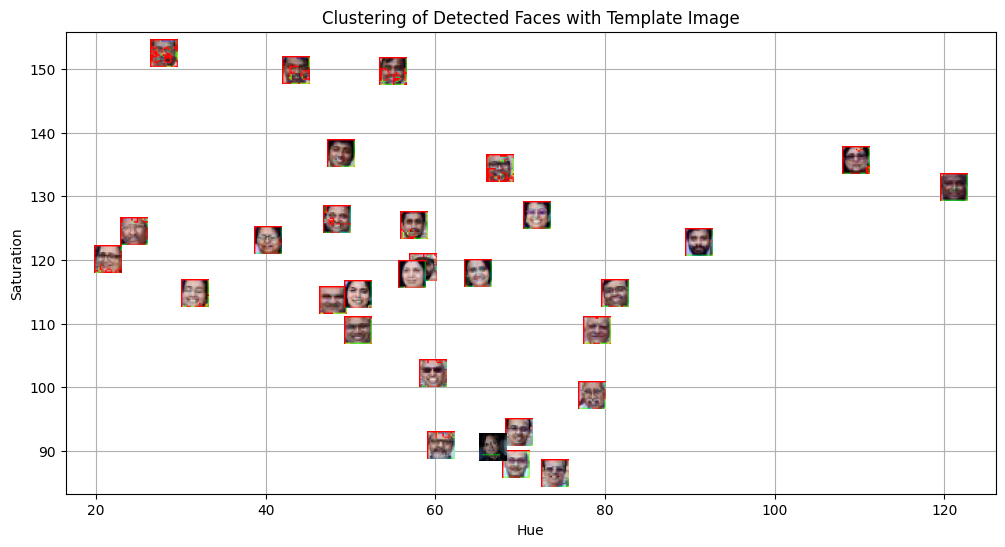

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustering of Detected Faces with Template Image")
plt.grid(True)
plt.savefig("face_clustering_2.png", dpi=300, bbox_inches='tight')
plt.show()

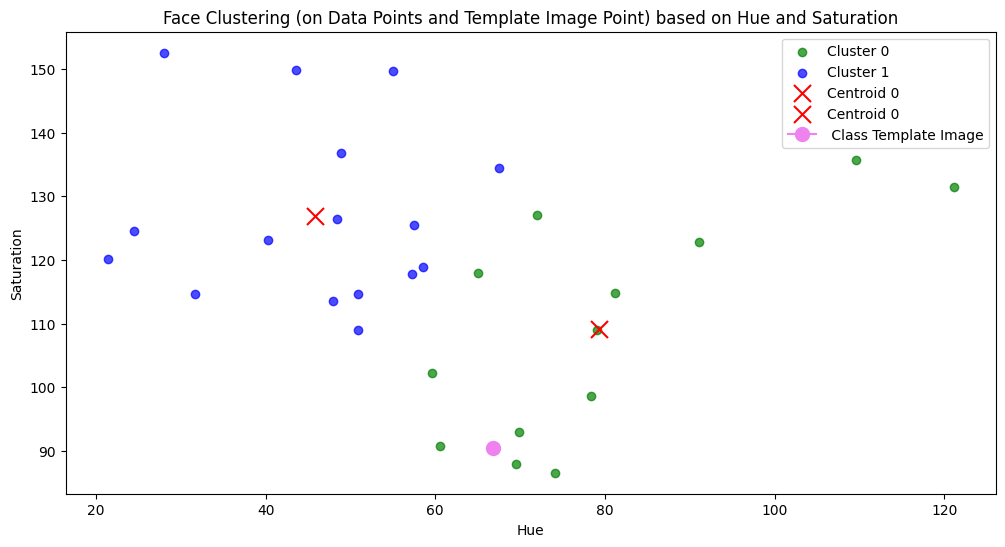

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0", alpha=0.7)


# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1", alpha=0.7)


# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=150, label="Centroid 0")  ## plot for centroid 0

plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=150, label="Centroid 0")    ## plot for centroid 1


plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class Template Image' )

plt.xlabel("Hue")  
plt.ylabel("Saturation")  
plt.title("Face Clustering (on Data Points and Template Image Point) based on Hue and Saturation")  
plt.legend()  
plt.savefig("hue_and_saturation_clustering_2.png", dpi=300, bbox_inches='tight')
plt.show()
                                            ## End of the lab 5 ##

# Report:
# Answer the following questions within your report:


## 1. What are the common distance metrics used in distance-based classification algorithms? /
Euclidean, Mahalanobis, Minkowski, Chebyshev, Manhattan, Cosine, Hamming distances.


## 2. What are some real-world applications of distance-based classification algorithms? 
Spam detection, Face recognition, Medical Diagnosis, and essentially an acitivity revolving around classification of objects/images.


## 3. Explain various distance metrics. 
Euclidean: Straight-line distance between two points in space (measurable using a ruler).

Mahalanobis: Accounts for correlations (or covariances) between the features gives the distance keeping the former in consideration. Also helpful in finding outliers, or points which might have same Euclidean distance from the centroid of the distribution but one lies within the distribution and the other doesn't, and classification as well.

Minkowski: This is a generalized distance formula which can give other distances for certain values of r.

Chebyshev: Distance between two vectors is the greatest of their differences along any coordinate dimension.

Manhattan: Is the sum of absolute differences between points across all the dimensions.

Cosine: Degree of angle between two vectors.

Hamming: Measures the similarity between two strings of the same length.


## 4. What is the role of cross validation in model performance? 
Cross-validation helps in assessing a model's performance by splitting the dataset into multiple variations of training and validation sets. This ensures that the model generalizes well to unseen data, and provides accurate results.


## 5. Explain variance and bias in terms of KNN? 
Bias : leads to oversimplification of the model hence making it prone to under-fitting.
Variance : Pays a lot of attention to the details of the training set that it becomes unable to generalize new data.